## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [4]:
#import pandas as pd
#import seaborn as sns
#from sklearn import datasets
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
#from sklearn.model_selection import train_test_split

#boston = datasets.load_boston()
#X = pd.DataFrame(boston.data, columns = boston.feature_names)
#y = pd.DataFrame(boston.target, columns = ['MEDV'])
import graphviz

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
#X.head()

In [ ]:
#y.head()

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [94]:
boston = pd.read_csv("C:/Users/vitor/Desktop/EBAC/atividades/boston.csv")
boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
boston = boston.drop('Unnamed: 0', axis=1)

In [16]:
X = boston.drop("Price", axis=1)
y = boston["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [18]:
arvore = DecisionTreeRegressor( random_state=100)

arvore.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [19]:
prev_arvore = arvore.predict(X_train)
prev_arvore

array([20.2, 21.4, 14.6, 34.9, 23.9, 23.2, 16.8, 15.7, 20.6, 31.6, 23.7,
       17.2, 33. , 28.7, 21.9, 25.2, 20.6, 16.2, 28.7, 22. , 19. , 34.9,
       28. , 22.6, 22.6, 17.8, 29. , 19.3, 37. , 17.1, 18.6, 22.8, 19.8,
       14.8, 21.7, 24.3, 43.5, 20.3, 26.4, 20.8, 13.8, 16.1, 31.7, 15.6,
       14.4,  5. , 50. , 16.4, 20. , 15.2, 22.2, 25.1, 19.2, 32. , 19.9,
       14.1, 18.7, 12.3, 22.3, 31. , 20.5, 23.3, 13.4, 13.9, 23.6, 16.6,
       18.5, 19.4, 11.9, 19.6, 19.6, 23.6, 27.9, 29.8, 50. , 17.5, 20.3,
       36.1, 21.7, 10.8, 23.1, 23.1, 20.1, 23. , 14.6, 16.6, 33.2, 18.9,
       11.9, 30.8, 50. , 25. , 24.6, 11.3, 48.3, 15. , 23.9, 21.9, 30.1,
       13.8, 10.2, 23.5, 18.4, 21.2, 21.6, 50. , 32. , 18. , 13.1, 12.1,
       15. , 28.4, 20.7, 24.8, 13.2, 27.9, 17.3, 23. , 21.7, 16.3, 19.9,
       18.3, 18.3, 26.6, 24.1, 22.7, 25. , 17.8, 17.2, 50. , 24.6, 21. ,
       10.4,  8.4, 36. , 18.7, 24.4, 18.8, 24.3, 24.5, 25.3, 22.9,  7.4,
       20.6,  5. ,  8.4, 17.7, 19.9, 11.7, 22.2, 37

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [20]:
path = arvore.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 4.81723889e-16, 6.42298518e-16, 1.28459704e-15,
        1.28459704e-15, 1.28459704e-15, 1.76632093e-14, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.88323917e-05, 1.88323917e-05, 1.88323917e-05, 1.88323917e-05,
        4.23728814e-05, 4.23728814e-05, 5.64971751e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        5.64971751e-05, 5.64971751e-05, 5.64971751e-05, 6.35593221e-05,
        7.53295669e-05, 7.53295669e-05, 7.53295669

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [21]:
#Separando os "alfas"
ccp_alphas = path['ccp_alphas']

In [22]:
# Lista para armazenar as árvores treinadas
trees = []

In [23]:
# Treinando uma árvore para cada valor de alpha e armazenando na lista
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [26]:
MSEs = []
for arv in trees:
    #prev_arv_test = arv.predict(X_test)
    prev_arv_train = arv.predict(X_train)
    mse_train = mean_squared_error(y_train, prev_arv_train)
    MSEs.append(mse_train)
    

In [33]:
MSEs[:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.237288135593241e-05,
 5.649717514124254e-05,
 5.649717514124254e-05]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

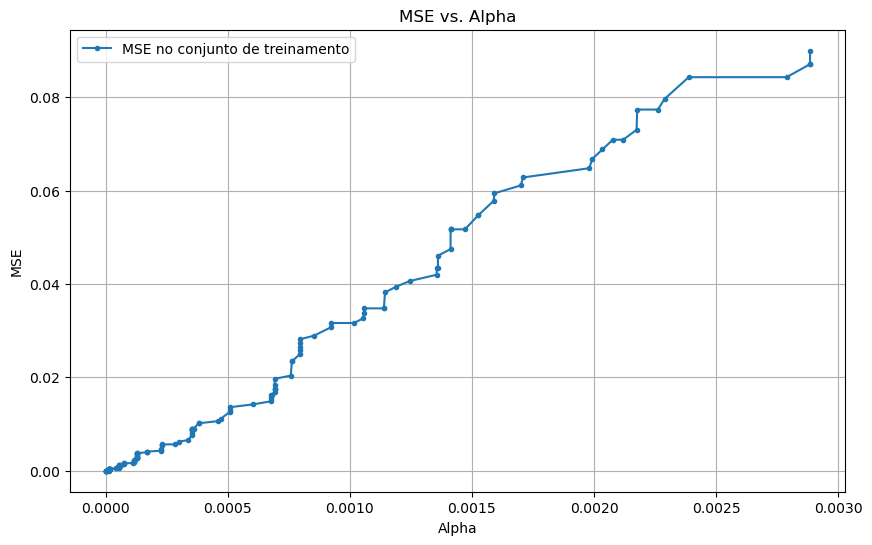

In [56]:
# Plotar o gráfico de MSE vs. Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-150], MSEs[:-150], marker='.', linestyle='-', label='MSE no conjunto de treinamento')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
df = pd.DataFrame({
    'Alpha': ccp_alphas,
    'MSE': MSEs,
    'arvores': trees 
})
df.head(9)

,Alpha,MSE,arvores
0,0.000000e+00,0.000000,DecisionTreeRegressor(random_state=0)
1,4.817239e-16,0.000000,DecisionTreeRegressor(ccp_alpha=4.817238886509...
2,6.422985e-16,0.000000,DecisionTreeRegressor(ccp_alpha=6.422985182012...
3,1.284597e-15,0.000000,DecisionTreeRegressor(ccp_alpha=1.284597036402...
4,1.284597e-15,0.000000,DecisionTreeRegressor(ccp_alpha=1.284597036402...
5,1.284597e-15,0.000000,DecisionTreeRegressor(ccp_alpha=1.284597036402...
6,1.766321e-14,0.000000,DecisionTreeRegressor(ccp_alpha=1.766320925053...
7,1.412429e-05,0.000042,DecisionTreeRegressor(ccp_alpha=1.412429378385...
8,1.412429e-05,0.000056,DecisionTreeRegressor(ccp_alpha=1.412429378401...


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [60]:
arvore_n8 = df.arvores[8]

In [61]:
arvore_n8.score(X_train, y_train)

0.9999992678095674

### 7. Visualize esta árvore.

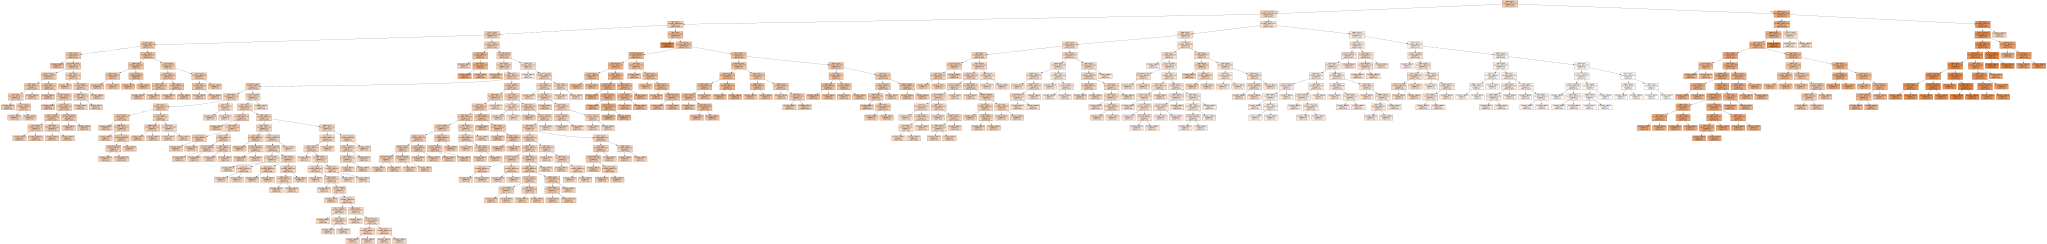

In [65]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(arvore_n8, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph